<a href="https://colab.research.google.com/github/ian-mutai0/Autolib-car-sharing-hypothesis/blob/main/Ian_Mutai_Week_3_IP_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB ELECTRIC CAR USAGE PROJECT**

# 1.0 Defining the Question

> ## Specifying the data analytic question

> I have been asked to investigate a claim on blue cars from the Autolib dataset. 
- **Null hypothesis** : The average number of bluecars taken on Monday is similar to the average number of bluecars taken on Tuesday
- **Alternative Hypothesis** : The average number of bluecars taken on Monday is different to the average number of bluecars taken on Tuesday

> ## Defining the Metric for Success

> To be able to carry out hypothesis testing as our solution to the above data analytic question and be able to decide whether to reject or fail to reject the null hypothesis. 

> ## Understanding the context

> As a data scientist, I have been tasked to investigate a claim about the blue cars from the provided Autolib dataset. Autolib is an electric car sharing company that deals with other electric cars as well such as the Utilib and the Utilib 1.4. 

> ## Recording the Experimental Design

> - Reading the dataset into our environment.
- Tidying the data by checking for outliers, null values and duplicates and dealing with them.
- Plotting univariate and bivariate summaries recording the observations.
 Implementing the solution by performing the hypothesis testing.
- Intepret the resultant test statistic and p value so as to decide whether we will reject or fail to reject the null hypothesis. 

> ## Data Relevance

> - The dataset we have been provided is relevant because data such as the number of blue cars returned or taken, the postal code to show the location and the dates are all necessary in helping us understand the electric car usage in Paris. 

# 2.0 Importing the relevant libraries

In [1]:
# Import all the necessary libraries
import pandas as pd
pd.options.mode.chained_assignment=None
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats

# 3.0 Loading the dataset into our environment

In [2]:
autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')

# 4.0 Previewing the dataset

In [3]:
# Determining the number of records in our dataset
autolib.shape

(16085, 13)

In [4]:
# Checking the datatypes for each column
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [5]:
# The top 5 records in the dataset
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# The bottom 5 records in the dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# A random sample within the dataset
autolib.sample()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1642,75011,3/27/2018,1440,1,weekday,450,442,16,16,24,25,91,88


# 5.0 Data Cleaning

### i) Validity

In [8]:
# This involves checking and then dropping the irrelevant columns 
# We will only need the bluecars columns, thus we can drop the other cars
autolib.drop("Utilib_taken_sum", axis = 1, inplace=True)
autolib.drop("Utilib_returned_sum", axis=1, inplace=True)
autolib.drop("Utilib_14_taken_sum", axis=1, inplace=True)
autolib.drop("Utilib_14_returned_sum", axis=1, inplace=True)
autolib.drop("Slots_freed_sum", axis=1, inplace=True)
autolib.drop("Slots_taken_sum", axis=1, inplace=True)

> ## ii) Accuracy

> ## iii) Completeness

In [9]:
# Checking for null values within the data
autolib.isna().any()

Postal code              False
date                     False
n_daily_data_points      False
dayOfWeek                False
day_type                 False
BlueCars_taken_sum       False
BlueCars_returned_sum    False
dtype: bool

## iv) Consistency

In [10]:
# This involves checking for duplicate values
autolib.duplicated().any()

False

> ## v) Uniformity

In [11]:
# We check if all columns are uniform with each other 
# Also we make sure all column names are similar
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [12]:
# We could also go ahead to identify the days of the week by their actual names
autolib['day'] = autolib['dayofweek'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,day
0,75001,1/1/2018,1440,0,weekday,110,103,Monday
1,75001,1/2/2018,1438,1,weekday,98,94,Tuesday
2,75001,1/3/2018,1439,2,weekday,138,139,Wednesday
3,75001,1/4/2018,1320,3,weekday,104,104,Thursday
4,75001,1/5/2018,1440,4,weekday,114,117,Friday


In [13]:
# We could also change the date column to datetime
#pd.to_datetime(autolib['date'])

> ## vi) Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


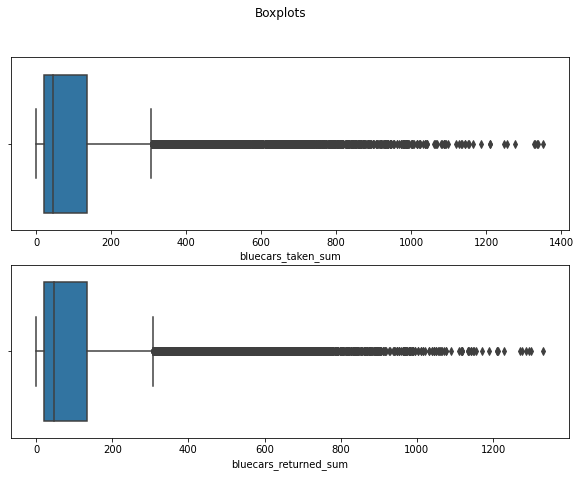

In [14]:
# We can identify outliers in our data using boxplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib['bluecars_taken_sum'], ax=ax1)
sns.boxplot(autolib['bluecars_returned_sum'], ax=ax2)
plt.show()

> We will not drop the outliers because they are an actual representation of the number of blue cars taken or returned with some areas using more blue cars than others. 

# 6.0 Exploratory Data Analysis

## 6.1 Univariate Analysis

> ### 6.1.1 Categorical Variables

> #### a) Frequency Tables

In [15]:
# Frequency of day type
daytype = autolib.day_type.value_counts()
print("The frequency table of the day type is: \n", daytype)
print("\n")

# Frequency of the days of the week
day = autolib.day.value_counts()
print("The frequency table of the days of the week is: \n", day)
print("\n")

The frequency table of the day type is: 
 weekday    11544
weekend     4541
Name: day_type, dtype: int64


The frequency table of the days of the week is: 
 Monday       2374
Tuesday      2363
Sunday       2274
Friday       2271
Thursday     2268
Wednesday    2268
Saturday     2267
Name: day, dtype: int64




#### b) Histograms

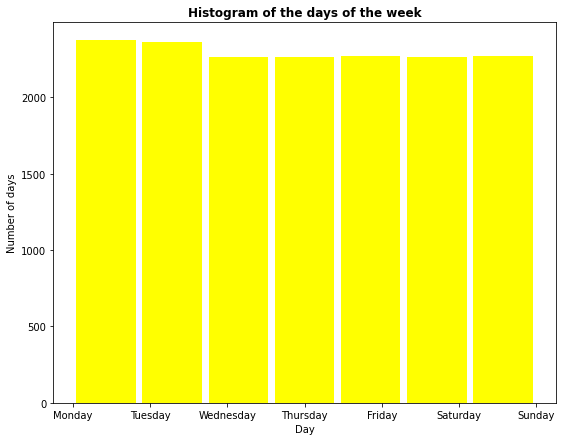

In [16]:
# Histogram of the days of the week
day = autolib['day']
fig=plt.figure(figsize=(9,7))
plt.hist(day, bins=7, histtype='bar', color='yellow', rwidth=0.9)
plt.title("Histogram of the days of the week", fontweight='bold')
plt.xlabel("Day")
plt.ylabel("Number of days")
plt.show()

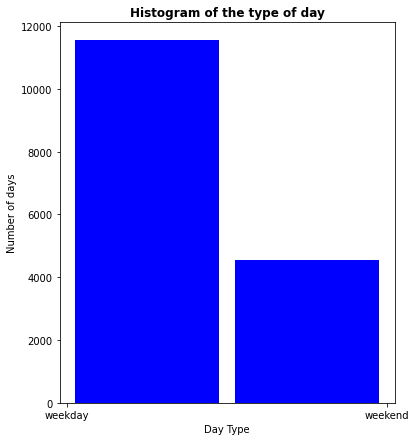

In [17]:
# Histogram of the day type
daytype = autolib['day_type']
fig=plt.figure(figsize=(6,7))
plt.hist(daytype, bins=2, histtype='bar', color='blue', rwidth=0.9)
plt.title("Histogram of the type of day", fontweight='bold')
plt.xlabel("Day Type")
plt.ylabel("Number of days")
plt.show()

#### c) Pie Charts

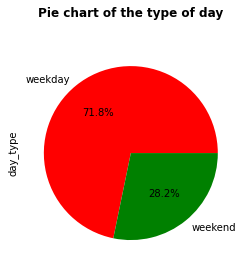

In [18]:
# Pie chart of the type of day
autolib['day_type'].value_counts().plot(kind='pie',colors=['red','green'], autopct='%1.1f%%')
plt.title("Pie chart of the type of day", y=1.1, fontweight='bold')
plt.show()

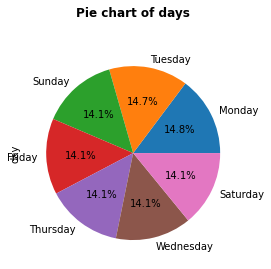

In [19]:
# Pie chart of the number of days 
autolib['day'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie chart of days", y=1.1, fontweight='bold')
plt.show()

### 6.1.2 Numerical Variables

#### a) Measures of central tendency 

In [20]:
# The measures of central tendency are: mean, median and mode

In [21]:
# Mean of the bluecars taken 
taken_mean = autolib['bluecars_taken_sum'].mean()
print("The mean of the bluecars taken is: ", taken_mean)
print('\n')

# Mean of the bluecars returned
returned_mean = autolib['bluecars_returned_sum'].mean()
print("The mean of the bluecars returned is: ", returned_mean)


The mean of the bluecars taken is:  125.92695057506994


The mean of the bluecars returned is:  125.912713708424


In [22]:
# Median of the bluecars taken
taken_median = autolib['bluecars_taken_sum'].median()
print("The median of the bluecars taken is: ", taken_median)
print('\n')

# Median of the bluecars returned
returned_median = autolib['bluecars_returned_sum'].median()
print("The median of the bluecars returned is: ", returned_median)

The median of the bluecars taken is:  46.0


The median of the bluecars returned is:  46.0


In [23]:
# Mode of the bluecars taken
taken_mode  = autolib['bluecars_taken_sum'].mode()
print("The mode of the bluecars taken is: \n", taken_mode)
print('\n')

# Mode of the bluecars returned 
returned_mode = autolib['bluecars_returned_sum'].mode()
print("The mode of the bluecars returned is: \n", returned_mode)

The mode of the bluecars taken is: 
 0    12
dtype: int64


The mode of the bluecars returned is: 
 0    13
dtype: int64


#### b) Measures of dispersion

In [24]:
# Standard Deviation 
taken_std = autolib['bluecars_taken_sum'].std()
print("The standard deviation of the bluecars taken is: ", taken_std)
print('\n')

returned_std = autolib['bluecars_returned_sum'].std()
print("The standard deviation of the bluecars returned is: ", returned_std)

The standard deviation of the bluecars taken is:  185.42657876727893


The standard deviation of the bluecars returned is:  185.50153480148427


In [25]:
# Variance
taken_var = autolib['bluecars_taken_sum'].var()
print("The variance of the bluecars taken is: \n", taken_var)
print('\n')

returned_var = autolib['bluecars_returned_sum'].var()
print("The variance of the bluecars returned is: \n", returned_var)
print('\n')

The variance of the bluecars taken is: 
 34383.01611333789


The variance of the bluecars returned is: 
 34410.819413706275




In [26]:
# Range
taken_max = autolib['bluecars_taken_sum'].max()
taken_min = autolib['bluecars_taken_sum'].min()
range = taken_max - taken_min 
print("The range of the bluecars taken is: \n", range)
print('\n')

returned_max = autolib['bluecars_returned_sum'].max()
returned_min = autolib['bluecars_returned_sum'].min()
range = returned_max - returned_min 
print("The range of the bluecars returned is: \n", range)
print('\n')

The range of the bluecars taken is: 
 1352


The range of the bluecars returned is: 
 1332




In [27]:
# Quantiles
taken_quantiles = autolib['bluecars_taken_sum'].quantile([0.25,0.50,0.75])
print("The quantiles for the bluecars taken are: \n", taken_quantiles)
print('\n')

returned_quantiles = autolib['bluecars_returned_sum'].quantile([0.25,0.50,0.75])
print("The quantiles for the bluecars returned are: \n", returned_quantiles)
print('\n')

The quantiles for the bluecars taken are: 
 0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64


The quantiles for the bluecars returned are: 
 0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64




In [28]:
# Skewness
taken_skew = autolib['bluecars_taken_sum'].skew()
print("The skewness of the bluecars taken is: \n", taken_skew)
if taken_skew == 0:
  print("The distribution is symmetrical")
elif taken_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

returned_skew = autolib['bluecars_returned_sum'].skew()
print("The skewness of the bluecars returned is: \n", returned_skew)
if returned_skew == 0:
  print("The distribution is symmetrical")
elif returned_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness of the bluecars taken is: 
 2.4063548974959086
The distribution is positively skewed


The skewness of the bluecars returned is: 
 2.412084978838923
The distribution is positively skewed




In [29]:
# Kurtosis
taken_kurt = autolib['bluecars_taken_sum'].kurt()
print("The kurtosis of the bluecars taken is: \n", taken_kurt)

if taken_kurt > 0:
  print("Leptokurtic")
elif taken_kurt < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

returned_kurt = autolib['bluecars_returned_sum'].kurt()
print("The kurtosis of the bluecars returned is: \n", returned_kurt)

if returned_kurt > 0:
  print("Leptokurtic")
elif returned_kurt < 0:
  print("Platykurtic")
else:
  print("Mesokurtic")
print('\n') 

The kurtosis of the bluecars taken is: 
 6.172692305510042
Leptokurtic


The kurtosis of the bluecars returned is: 
 6.1862880957582345
Leptokurtic




In [30]:
# Summary statistsics for the bluecars returned
autolib['bluecars_returned_sum'].describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64

In [31]:
# Summary statistics for the bluecars taken
autolib['bluecars_taken_sum'].describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

### 6.1.3 Visualization techniques

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


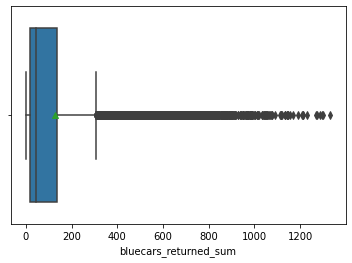

In [32]:
# Box plot of the bluecars returned
sns.boxplot(autolib['bluecars_returned_sum'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


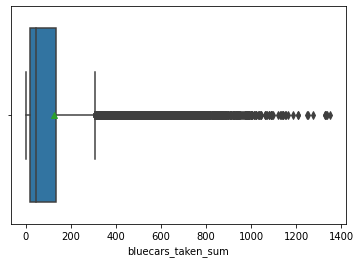

In [33]:
# Box plot of the bluecars taken
sns.boxplot(autolib['bluecars_taken_sum'], showmeans=True)

## 6.2 Bivariate Analysis

### 6.2.1 Numerical and Numerical Variables

#### a) Scatter Plots

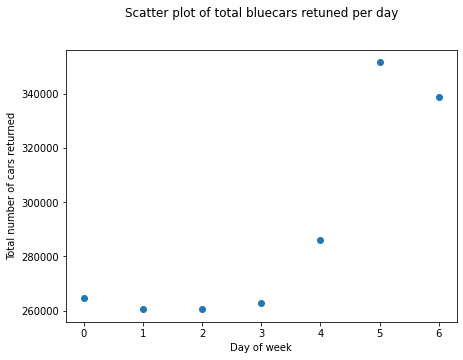

In [34]:
# Scatter plots
# First we can group the day by the number of bluecars returned
size=autolib.groupby('dayofweek')['bluecars_returned_sum'].sum().reset_index(name='total number of cars returned per day')
size
plt.figure(figsize=(7,5))
plt.scatter(size["dayofweek"] , size["total number of cars returned per day"])
plt.xlabel("Day of week")
plt.ylabel("Total number of cars returned")
plt.title("Scatter plot of total bluecars retuned per day", y=1.1)
plt.show()

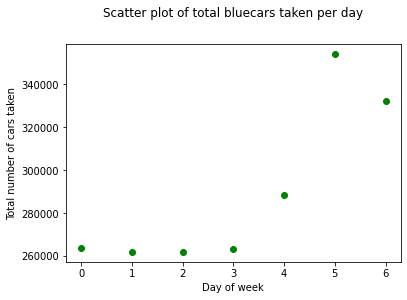

In [35]:
# Scatter plot of the total bluecars taken per day
size=autolib.groupby('dayofweek')['bluecars_taken_sum'].sum().reset_index(name='total number of cars taken per day')
size
plt.scatter(size["dayofweek"] , size["total number of cars taken per day"], c='g')
plt.xlabel("Day of week")
plt.ylabel("Total number of cars taken")
plt.title("Scatter plot of total bluecars taken per day", y=1.1)
plt.show()

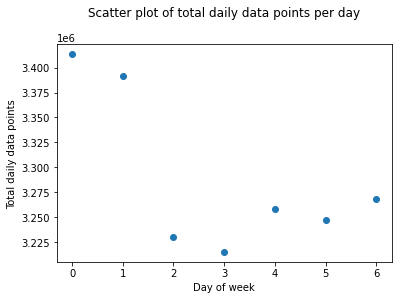

In [36]:
# Scatter plot of total daily points per day
size=autolib.groupby('dayofweek')['n_daily_data_points'].sum().reset_index(name='total daily data points per day')
size
plt.scatter(size["dayofweek"] , size["total daily data points per day"])
plt.xlabel("Day of week")
plt.ylabel("Total daily data points")
plt.title("Scatter plot of total daily data points per day", y=1.1)
plt.show()

#### b) Correlation

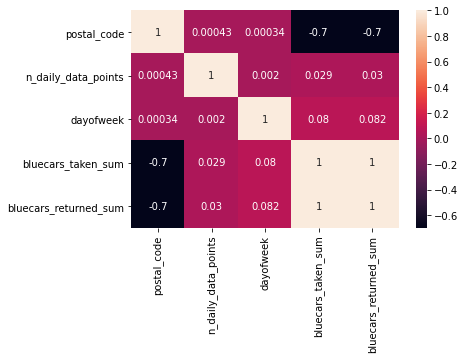

In [37]:
# Correlation using a heatmap
sns.heatmap(autolib.corr(),annot=True)
plt.show()

### 6.2.2 Categorical and Categorical Variables

#### a) Stacked Column Chart

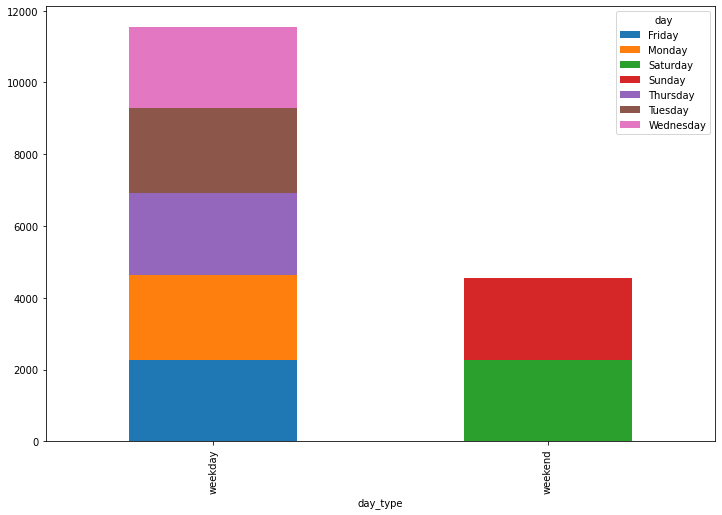

In [38]:
# Stacked column chart of the day by day type
pd.crosstab(autolib['day_type'],autolib['day']).plot(kind="bar",stacked=True,figsize=(12,8))

### 6.2.3 Categorical and Numerical Variables

#### a) Line graph

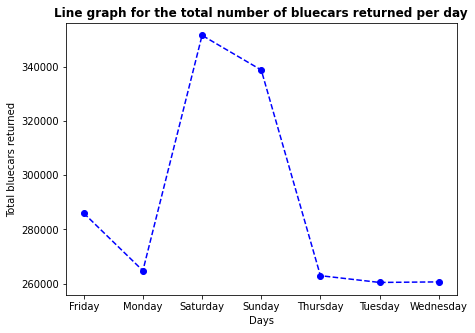

In [53]:
# Line graph for number of bluecars returned per day 
# First we group the days by the total bluecars returned
returned = autolib.groupby('day')['bluecars_returned_sum'].sum().reset_index(name= 'total number of bluecars returned')
returned
# We then use the following axes
x = returned['day']
y= returned['total number of bluecars returned']
# Plot the line graph 
plt.figure(figsize=(7,5))
plt.plot(x,y, color = 'blue', marker = 'o', linestyle = '--')
plt.xlabel('Days')
plt.ylabel('Total bluecars returned')
plt.title("Line graph for the total number of bluecars returned per day", fontweight='bold')
plt.show()

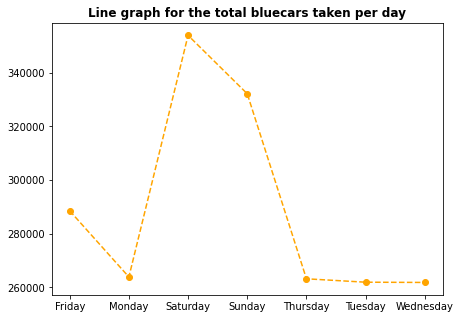

In [40]:
# Line graph of bluecars taken per day
taken = autolib.groupby('day')['bluecars_taken_sum'].sum().reset_index(name= 'total_bluecars_taken_sum')
taken
x = taken['day']
y= taken['total_bluecars_taken_sum']
plt.figure(figsize=(7,5))
plt.title("Line graph for the total bluecars taken per day", fontweight='bold')
plt.plot(x,y, color = 'orange', marker = 'o', linestyle = '--')
plt.show()

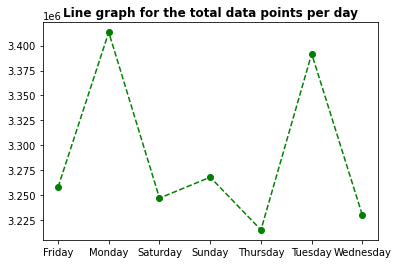

In [41]:
# Line graph for daily data points
points = autolib.groupby('day')['n_daily_data_points'].sum().reset_index(name= 'total_n_daily_data_points')
x = points['day']
y= points['total_n_daily_data_points']
plt.title("Line graph for the total data points per day", fontweight='bold')
plt.plot(x,y, color = 'green', marker = 'o', linestyle = '--' )
plt.show()

# 7.0 Implementing the Solution

> # Hypothesis Testing

In [42]:
# First we locate the weekdays in our dataset
weekday = autolib.loc[autolib['day_type'] == 'weekday']
weekday

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,day
0,75001,1/1/2018,1440,0,weekday,110,103,Monday
1,75001,1/2/2018,1438,1,weekday,98,94,Tuesday
2,75001,1/3/2018,1439,2,weekday,138,139,Wednesday
3,75001,1/4/2018,1320,3,weekday,104,104,Thursday
4,75001,1/5/2018,1440,4,weekday,114,117,Friday
...,...,...,...,...,...,...,...,...
16078,95880,6/13/2018,1440,2,weekday,12,13,Wednesday
16079,95880,6/14/2018,1439,3,weekday,15,13,Thursday
16080,95880,6/15/2018,1440,4,weekday,15,10,Friday
16083,95880,6/18/2018,1440,0,weekday,11,14,Monday


In [43]:
# We then locate the specific days that is Monday and Tuesday
specific_day = weekday.loc[(weekday['dayofweek'] == 0) | (weekday['dayofweek'] == 1)]
specific_day

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,day
0,75001,1/1/2018,1440,0,weekday,110,103,Monday
1,75001,1/2/2018,1438,1,weekday,98,94,Tuesday
7,75001,1/8/2018,1438,0,weekday,84,83,Monday
8,75001,1/9/2018,1439,1,weekday,81,84,Tuesday
14,75001,1/15/2018,1440,0,weekday,107,107,Monday
...,...,...,...,...,...,...,...,...
16070,95880,6/5/2018,1439,1,weekday,4,6,Tuesday
16076,95880,6/11/2018,1440,0,weekday,17,18,Monday
16077,95880,6/12/2018,1439,1,weekday,25,25,Tuesday
16083,95880,6/18/2018,1440,0,weekday,11,14,Monday


In [44]:
# We then drop the unnecessary columns which we won't use in our solution
specific_day.drop(['date', 'day_type', 'day', 'n_daily_data_points'], axis=1, inplace=True)

In [45]:
# Stratified Sampling Technique
strat_output = specific_day.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
strat_output

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
8233,92350,0,19,20
6563,92240,0,102,95
15808,95870,0,14,14
9009,92400,0,97,101
12007,93390,0,3,1
...,...,...,...,...
1857,75012,1,459,461
8388,92360,1,10,3
10070,93100,1,108,118
3305,75116,1,14,13


In [46]:
# Stratified Sampling
#strat_output = weekend.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

In [47]:
# Pop mean 
pop_mean = autolib['bluecars_taken_sum'].mean()
pop_mean

125.92695057506994

In [48]:
# Sample Mean 
sample_mean = strat_output['bluecars_taken_sum'].mean()
sample_mean

113.44397463002115

In [49]:
# Standard Deviation
sample_std = strat_output['bluecars_taken_sum'].std()
sample_std

153.8439720078493

In [59]:
# Z-score for bluecars taken during the weekend
z_score = (pop_mean - sample_mean) / sample_std
z_score

0.08114049437316853

In [60]:
# P-value 
pvalue = stats.norm.cdf(z_score)
pvalue

0.5323348890065372

In [58]:
# Interpret the p value 
# by comparing with the significance level

alpha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis and accept the alternative hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


In [61]:
# Calculating the point estimate
point_estimate = pop_mean - sample_mean
point_estimate

12.482975945048793

In [63]:
import math

# Calculating the z-critical and the confidence interval

z_critical = stats.norm.ppf(q = 0.975)  

print("z-critical value is :", z_critical)                         

pop_stdev = autolib['bluecars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(473))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval is :", confidence_interval)

z-critical value is : 1.959963984540054
Confidence interval is : (96.73347227158973, 130.15447698845256)


# Conclusion

> In conclusion, we fail to reject the null hypothesis since the evidence suggests that the average number of blue cars taken on Monday is similar to the average number of blue cars taken on Tuesday.